#### Porco ou cachorro?

In [44]:
# features [1: sim, 0: não]

# pelo curto
# perna curta?
# faz auau?

porco1 = [0, 1, 0] # Não tem pelo curto, perna curta, não faz auau
porco2 = [0, 1, 1] # Não tem pelo curto, perna curta, faz auau
porco3 = [1, 1, 0] # Tem pelo curto, perna curta, não faz auau

cachorro1 = [1, 0, 1] # Tem pelo curto, não tem perna curta, faz auau
cachorro2 = [1, 0, 0] # Tem pelo curto, não tem perna curta, não faz auau
cachorro3 = [1, 1, 1] # Tem pelo curto, perna curta, faz auau

treino_x = [porco1, porco2, porco3, cachorro1, cachorro2, cachorro3]
treino_y = [1, 1, 1, 0, 0, 0]  # 1: porco, 0: cachorro

In [45]:
from sklearn.svm import LinearSVC

model = LinearSVC()

model.fit(treino_x, treino_y)

LinearSVC()

In [46]:
# deve ser porco
animal_misterioso = [1, 1, 0]  # pelo curto, perna curta, faz auau? 

model.predict([animal_misterioso]) 

array([1])

In [47]:
misterio1 = [1, 1, 0] # deve ser porco
misterio2 = [1, 1, 1] # deve ser cachorro
misterio3 = [0, 1, 1] # deve ser porco

teste_x = [misterio1, misterio2, misterio3]
previsoes = model.predict(teste_x)

In [48]:
for i, previsao in enumerate(previsoes):
    if previsao == 1:
        print(f"Misterio {i+1} é um porco")
    else:
        print(f"Misterio {i+1} é um cachorro")


Misterio 1 é um porco
Misterio 2 é um cachorro
Misterio 3 é um porco


In [49]:
teste_y = [0, 1, 1]

In [50]:
acertos = (previsoes == teste_y).sum()
total = len(teste_y)

In [51]:
from sklearn.metrics import accuracy_score

taxa_de_acerto = accuracy_score(teste_y, previsoes) * 100
print(f'Taxa de acerto: {taxa_de_acerto:.2f}%')

Taxa de acerto: 33.33%


#### Lendo dados da Web

In [52]:
import pandas as pd

In [53]:
uri = "https://gist.githubusercontent.com/guilhermesilveira/b9dd8e4b62b9e22ebcb9c8e89c271de4/raw/c69ec4b708fba03c445397b6a361db4345c83d7a/tracking.csv"

df = pd.read_csv(uri)

df.head()

,inicial,palestras,contato,comprou,patrocinio
0,1,1,0,0,0
1,1,1,0,0,0
2,1,1,0,0,0
3,1,1,0,0,0
4,1,1,0,0,0


In [54]:
y = df['comprou']
X = df.drop('comprou', axis=1)

X

,inicial,palestras,contato,patrocinio
0,1,1,0,0
1,1,1,0,0
2,1,1,0,0
3,1,1,0,0
4,1,1,0,0
...,...,...,...,...
94,0,0,1,0
95,1,1,1,0
96,0,0,1,0
97,0,1,0,0


In [55]:
df.shape

(99, 5)

In [56]:
treino_X = X[:75]
treino_y = y[:75]

teste_X = X[75:]
teste_y = y[75:]

print(f'Treinaremos com {len(treino_X)} elementos')
print(f'Testaremos com {len(teste_X)} elementos')

Treinaremos com 75 elementos
Testaremos com 24 elementos


In [57]:
from sklearn.svm import LinearSVC
from sklearn.metrics import accuracy_score

modelo = LinearSVC()

model.fit(treino_X, treino_y)
previsoes = model.predict(teste_X)

taxa_de_acerto = accuracy_score(teste_y, previsoes) * 100
print(f'Taxa de acerto: {taxa_de_acerto:.2f}%')


Taxa de acerto: 95.83%


#### Usando a biblioteca para separar treino e teste

In [58]:
from sklearn.model_selection import train_test_split
from sklearn.svm import LinearSVC
from sklearn.metrics import accuracy_score

SEED = 42

treino_X, teste_X, treino_y, teste_y = train_test_split(X, y, random_state = SEED, stratify=y)

modelo = LinearSVC()

print(f'Treinaremos com {len(treino_X)} elementos')
print(f'Testaremos com {len(teste_X)} elementos')

model.fit(treino_X, treino_y)
previsoes = model.predict(teste_X)

taxa_de_acerto = accuracy_score(teste_y, previsoes) * 100
print(f'Taxa de acerto: {taxa_de_acerto:.2f}%')


Treinaremos com 74 elementos
Testaremos com 25 elementos
Taxa de acerto: 96.00%


In [59]:
treino_y.value_counts()

comprou
0    49
1    25
Name: count, dtype: int64

In [60]:
teste_y.value_counts()

comprou
0    17
1     8
Name: count, dtype: int64

#### Curva de decisão

In [61]:
uri = "https://gist.githubusercontent.com/guilhermesilveira/12291c548acaf544596795709020e3db/raw/325bdef098bd9cbc2189215b7e32e22f437f29f3/projetos.csv"

df = pd.read_csv(uri)

df.head()

,nao_finalizado,horas_esperadas,preco
0,0,75.0,6985.000000
1,1,0.0,4325.293458
2,0,87.0,14205.000000
3,1,13.0,100.000000
4,0,2.0,202.000000


In [62]:
df['finalizado'] = df['nao_finalizado'].map({1: 0, 0: 1})

df['finalizado'].head()

0    1
1    0
2    1
3    0
4    1
Name: finalizado, dtype: int64

In [63]:
df

,nao_finalizado,horas_esperadas,preco,finalizado
0,0,75.0,6985.000000,1
1,1,0.0,4325.293458,0
2,0,87.0,14205.000000,1
3,1,13.0,100.000000,0
4,0,2.0,202.000000,1
...,...,...,...,...
2452,0,96.0,21115.000000,1
2453,1,1.0,172.000000,0
2454,0,0.0,526.775512,1
2455,1,16.0,184.000000,0


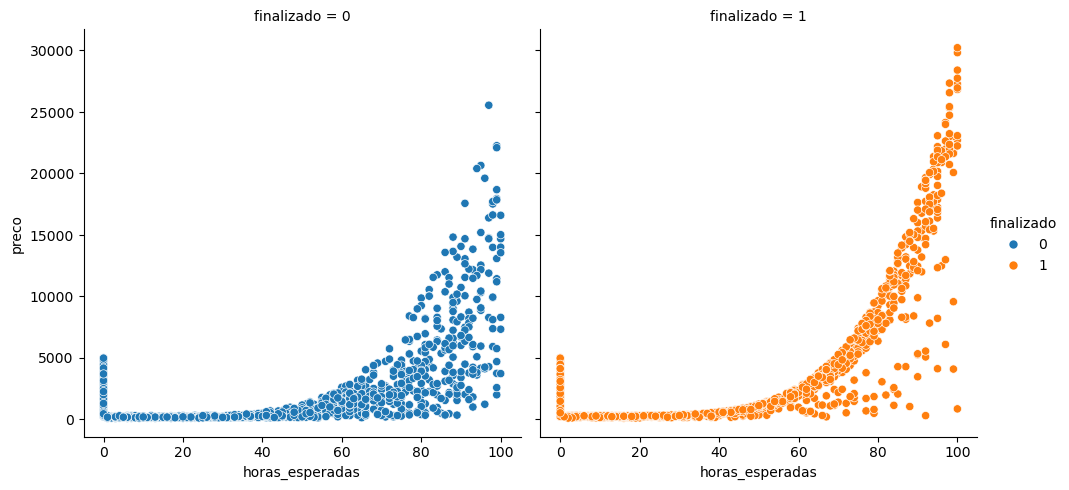

In [64]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.relplot(x='horas_esperadas', y='preco', hue="finalizado", data=df, col='finalizado');

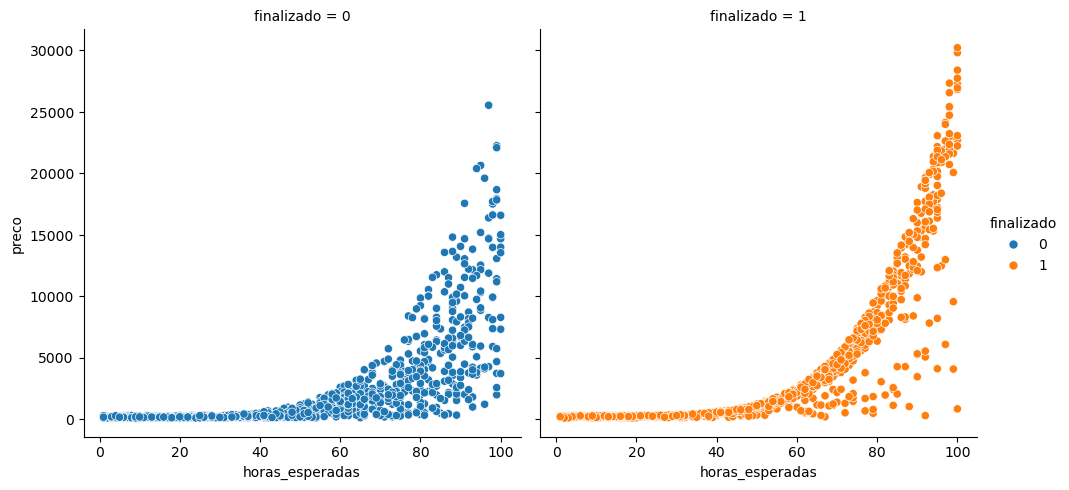

In [65]:
# jogar fora as linhas com horas esperadas iguais a zero
df = df[df['horas_esperadas'] > 0]
sns.relplot(x='horas_esperadas', y='preco', hue="finalizado", data=df, col='finalizado');

In [66]:
X = df[['horas_esperadas', 'preco']]
y = df['finalizado']

In [67]:
from sklearn.model_selection import train_test_split
from sklearn.svm import LinearSVC
from sklearn.metrics import accuracy_score

SEED = 42

treino_X, teste_X, treino_y, teste_y = train_test_split(X, y, random_state=SEED, stratify=df['finalizado'])

modelo = LinearSVC()
print(f'Treinaremos com {len(treino_X)} elementos')
print(f'Testaremos com {len(teste_X)} elementos')

modelo.fit(treino_X, treino_y)
previsoes = modelo.predict(teste_X)

acuracia = accuracy_score(teste_y, previsoes) * 100
print(f'Taxa de acerto: {acuracia:.2f}%')

Treinaremos com 1617 elementos
Testaremos com 540 elementos
Taxa de acerto: 56.30%


In [68]:
teste_y.value_counts()

finalizado
1    284
0    256
Name: count, dtype: int64

In [69]:
x_minimum = teste_X['horas_esperadas'].min()
x_maximum = teste_X['horas_esperadas'].max()
y_minimum = teste_X['preco'].min()
y_maximum = teste_X['preco'].max()

print(f'X: {x_minimum:.2f} - {x_maximum:.2f}')
print(f'Y: {y_minimum:.2f} - {y_maximum:.2f}')

X: 1.00 - 100.00
Y: 100.00 - 28398.00


In [70]:
import numpy as np

pixels = 100
eixo_x = np.arange(x_minimum, x_maximum, (x_maximum - x_minimum) / pixels)
eixo_y = np.arange(y_minimum, y_maximum, (y_maximum - y_minimum) / pixels)

xx, yy = np.meshgrid(eixo_x, eixo_y)

pontos = np.c_[xx.ravel(), yy.ravel()]
pontos

array([[1.000000e+00, 1.000000e+02],
       [1.990000e+00, 1.000000e+02],
       [2.980000e+00, 1.000000e+02],
       ...,
       [9.703000e+01, 2.811502e+04],
       [9.802000e+01, 2.811502e+04],
       [9.901000e+01, 2.811502e+04]], shape=(10000, 2))

/home/felipe/miniconda3/envs/my-ml-guide/lib/python3.13/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LinearSVC was fitted with feature names
  warnings.warn(


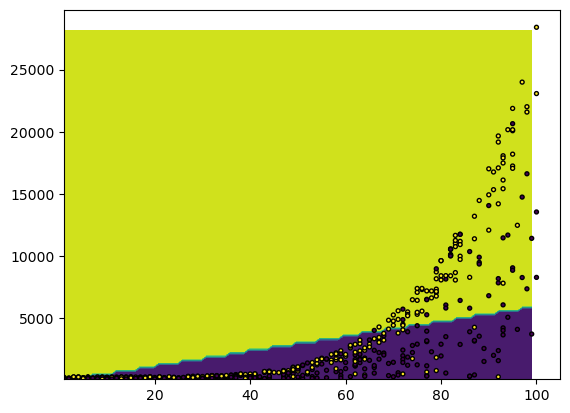

In [71]:
Z = modelo.predict(pontos)
Z = Z.reshape(xx.shape)

plt.contourf(xx, yy, Z)
plt.scatter(teste_X['horas_esperadas'], teste_X['preco'], c=teste_y, edgecolors='k', marker='o', s=8)

plt.show()

#### SVC


In [72]:
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier

SEED = 42


raw_treino_X, raw_teste_X, treino_y, teste_y = train_test_split(X, y, random_state = SEED, stratify=y)

print(f'Treinaremos com {len(raw_treino_X)} elementos')
print(f'Testaremos com {len(raw_teste_X)} elementos')

scaler = StandardScaler()
scaler.fit(raw_treino_X)

treino_X = scaler.transform(raw_treino_X)
teste_X = scaler.transform(raw_teste_X)

modelo = SVC(gamma='auto')


model.fit(treino_X, treino_y)
previsoes = model.predict(raw_teste_X)

taxa_de_acerto = accuracy_score(teste_y, previsoes) * 100
print(f'Taxa de acerto: {taxa_de_acerto:.2f}%')


Treinaremos com 1617 elementos
Testaremos com 540 elementos
Taxa de acerto: 52.59%


/home/felipe/miniconda3/envs/my-ml-guide/lib/python3.13/site-packages/sklearn/utils/validation.py:2732: UserWarning: X has feature names, but LinearSVC was fitted without feature names
  warnings.warn(


X: -1.74 - 1.73
Y: -1.74 - 4.90


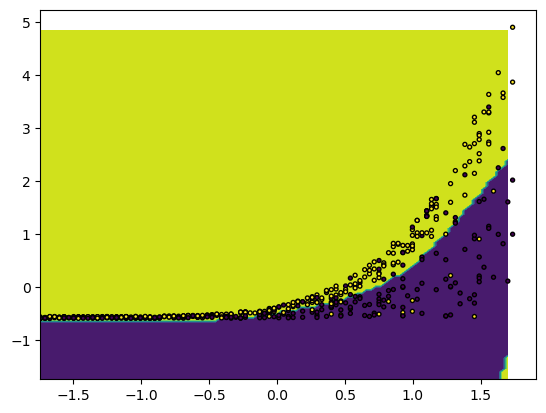

In [73]:
data_col1 = teste_X[:, 0]  # horas_esperadas
data_col2 = teste_X[:, 1]  # preco

x_minimum = data_col1.min()
x_maximum = data_col1.max()
y_minimum = teste_X.min()
y_maximum = teste_X.max()

print(f'X: {x_minimum:.2f} - {x_maximum:.2f}')
print(f'Y: {y_minimum:.2f} - {y_maximum:.2f}')


pixels = 100
eixo_x = np.arange(x_minimum, x_maximum, (x_maximum - x_minimum) / pixels)
eixo_y = np.arange(y_minimum, y_maximum, (y_maximum - y_minimum) / pixels)

xx, yy = np.meshgrid(eixo_x, eixo_y)

pontos = np.c_[xx.ravel(), yy.ravel()]

modelo.fit(treino_X, treino_y)

Z = modelo.predict(pontos)
Z = Z.reshape(xx.shape)

plt.contourf(xx, yy, Z)
plt.scatter(data_col1, data_col2, c=teste_y, edgecolors='k', marker='o', s=8)

plt.show()

In [74]:

dados = pd.read_csv("https://gist.githubusercontent.com/guilhermesilveira/dd7ba8142321c2c8aaa0ddd6c8862fcc/raw/e694a9b43bae4d52b6c990a5654a193c3f870750/precos.csv")
dados.head()

,milhas_por_ano,ano_do_modelo,preco,vendido
0,21801,2000,30941.02,1
1,7843,1998,40557.96,1
2,7109,2006,89627.50,0
3,26823,2015,95276.14,0
4,7935,2014,117384.68,1


In [75]:
dados["km_por_ano"] = dados["milhas_por_ano"] * 1.60934

from datetime import datetime

dados["idade"] = datetime.today().year - dados["ano_do_modelo"]

dados.drop(["milhas_por_ano", "ano_do_modelo"], axis=1, inplace=True)

In [76]:
SEED = 20

raw_treino_x, raw_teste_x, treino_y, teste_y = train_test_split(X, y, random_state = SEED, stratify = y)
print(f"Treinaremos com {len(raw_treino_x)}")
print(f"Testaremos com {len(raw_teste_x)}")

# scaler = StandardScaler()
# scaler.fit(raw_treino_x)

# treino_x = scaler.transform(raw_treino_x)
# teste_x = scaler.transform(raw_teste_x)

modelo = DecisionTreeClassifier(max_depth=3)
modelo.fit(raw_treino_x, treino_y)
previsoes = modelo.predict(raw_teste_x)

acuracia = accuracy_score(teste_y, previsoes) * 100
print(f"A acurácia foi de {acuracia:.2f}%")

Treinaremos com 1617
Testaremos com 540
A acurácia foi de 67.41%


In [77]:
df[['finalizado', 'preco']]

,finalizado,preco
0,1,6985.0
2,1,14205.0
3,0,100.0
4,1,202.0
5,1,1096.0
...,...,...
2451,1,11699.0
2452,1,21115.0
2453,0,172.0
2455,0,184.0


In [78]:
raw_treino_x

,horas_esperadas,preco
2000,4.0,162.0
1325,7.0,194.0
816,79.0,2015.0
715,71.0,4957.0
712,91.0,17564.0
...,...,...
764,64.0,1965.0
571,65.0,3461.0
1692,2.0,258.0
341,57.0,2098.0


In [79]:
raw_treino_x.query('preco < 200.5')

,horas_esperadas,preco
2000,4.0,162.0
1325,7.0,194.0
2139,26.0,165.0
71,48.0,198.0
2097,53.0,169.0
...,...,...
1366,37.0,141.0
205,9.0,128.0
1523,29.0,184.0
619,12.0,118.0


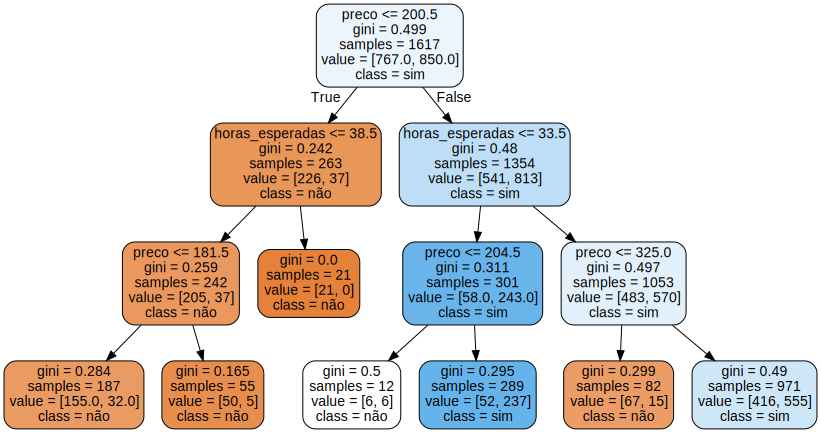

In [80]:
from sklearn.tree import export_graphviz
import graphviz
from graphviz import Source

estrutura = export_graphviz(modelo, filled=True, rounded=True,
                            feature_names=X.columns,
                            class_names=["não", "sim"])
grafico = graphviz.Source(estrutura)
grafico